In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('weatherAUS.csv')

In [6]:
df.replace("NA", np.nan, inplace=True)
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Define X and Y
X = df.drop(columns=['RainToday', 'RainTomorrow'])
Y = df[['RainToday', 'RainTomorrow']].copy()

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

In [11]:
X = X.drop(columns=['Date'])

In [12]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [13]:
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [14]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [15]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

In [16]:
X_encoded = ct.fit_transform(X)

In [17]:
encoded_feature_names = ct.get_feature_names_out()
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)
# print(X_encoded)

In [18]:
le = LabelEncoder()
Y['RainToday'] = le.fit_transform(Y['RainToday'])
Y['RainTomorrow'] = le.fit_transform(Y['RainTomorrow'])

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=1)

In [20]:
num_cols_after_encoding = X_encoded.columns[-len(num_cols):]

In [21]:
sc = StandardScaler()
X_train[num_cols_after_encoding] = sc.fit_transform(X_train[num_cols_after_encoding])
X_test[num_cols_after_encoding] = sc.transform(X_test[num_cols_after_encoding])

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [23]:
Y_pred = clf.predict(X_test)

In [26]:
accuracy_rain_today = accuracy_score(Y_test.iloc[:, 0], Y_pred[:, 0])
print(f'Random Forest Accuracy: {accuracy_rain_today:.4f}')

Random Forest Accuracy: 1.0000


In [27]:
accuracy_rain_tomorrow = accuracy_score(Y_test.iloc[:, 1], Y_pred[:, 1])
print(f'Random Forest Accuracy: {accuracy_rain_tomorrow:.4f}')

Random Forest Accuracy: 0.8560


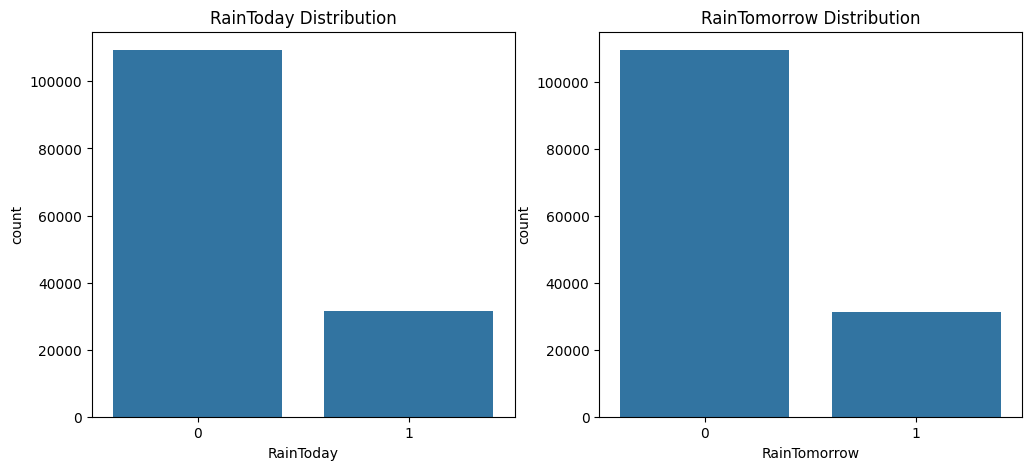

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Count plot for RainToday & RainTomorrow
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=Y['RainToday'], ax=ax[0])
ax[0].set_title("RainToday Distribution")

sns.countplot(x=Y['RainTomorrow'], ax=ax[1])
ax[1].set_title("RainTomorrow Distribution")

plt.show()